In [35]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [36]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
#pyo.init_notebook_mode()


#configure_plotly_browser_state()

pyo.init_notebook_mode(connected=True)

In [37]:
dea_types = ["IO_VRS", "OO_CRS", "OO_VRS", "IO_CRS"]
dea_list = ["US22", "S22","US55","S55"]

for t in dea_list:
    
    exec(f"{t} = pd.read_excel('Data/{t}.xlsx', index_col=0)")
    
    for i, d in enumerate(dea_types):
        
        exec(f"{t}_{d} = pd.read_excel('Data/{t}_Solution.xlsx', index_col=0, header=[1], nrows=1000, skiprows = i * 1000 + i * 2)")
        

In [38]:
dfs_data = [US22, S22, US55, S55]

dfs_es = [US22_IO_VRS, US22_OO_CRS, US22_OO_VRS, US22_IO_CRS,
      S22_IO_VRS, S22_OO_CRS, S22_OO_VRS, S22_IO_CRS,
      US55_IO_VRS, US55_OO_CRS, US55_OO_VRS, US55_IO_CRS,
      S55_IO_VRS, S55_OO_CRS, S55_OO_VRS, S55_IO_CRS]

### US22_IO_VRS 

In [39]:
X = dfs_data[0]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,508.49,291.16,644.74,441.73
DMU 2,332.53,260.31,389.95,509.59
DMU 3,359.05,161.13,445.83,548.45
DMU 4,404.83,236.18,448.47,510.64
DMU 5,527.84,258.88,411.59,316.40


In [40]:
y = dfs_es[0]
y.head()

,Efficiency
DMU,
DMU 1,0.970309
DMU 2,0.594647
DMU 3,0.680770
DMU 4,0.657605
DMU 5,0.533526


In [41]:
mitosheet.sheet(y, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-6e784293-cb7e-45ff-8377-377200b726e8", "code": {"imports…

In [68]:
df_res = pd.read_excel("Results.xlsx", header=1, usecols="A:D", sheet_name=None)

US22, S22, US55, S55  = df_res["US22"].fillna(method="ffill"), df_res["S22"].fillna(method="ffill"), df_res["US55"].fillna(method="ffill"), df_res["S55"].fillna(method="ffill")

mitosheet.sheet(US22, S22, US55, S55)

MitoWidget(analysis_data_json='{"analysisName": "UUID-d6c886c9-3994-4a26-8369-62dc41986d50", "code": {"imports…

In [43]:
res = pd.read_excel("Data/US22_ML.xlsx")
blue, red = res["Error_Perc < 3"].value_counts()

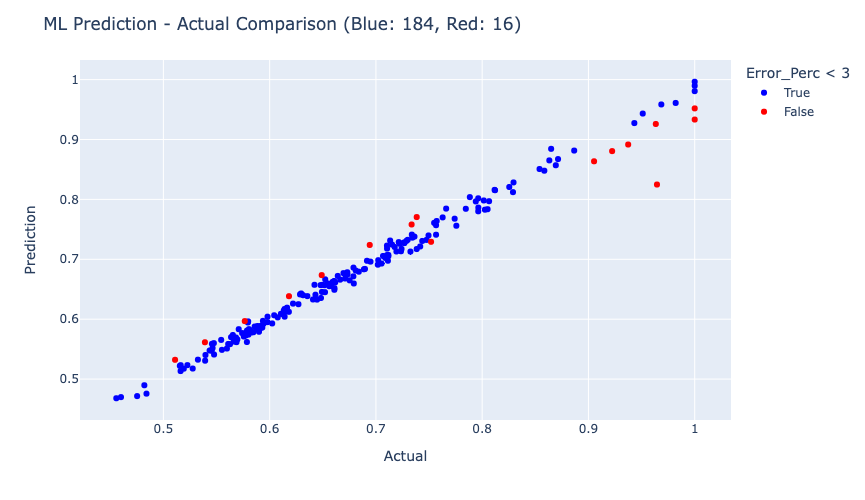

In [44]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc", ])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"ML Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [45]:
res_ann = pd.read_excel("Data/US22_DL.xlsx")
blue, red = res_ann["Error_Perc < 3"].value_counts()

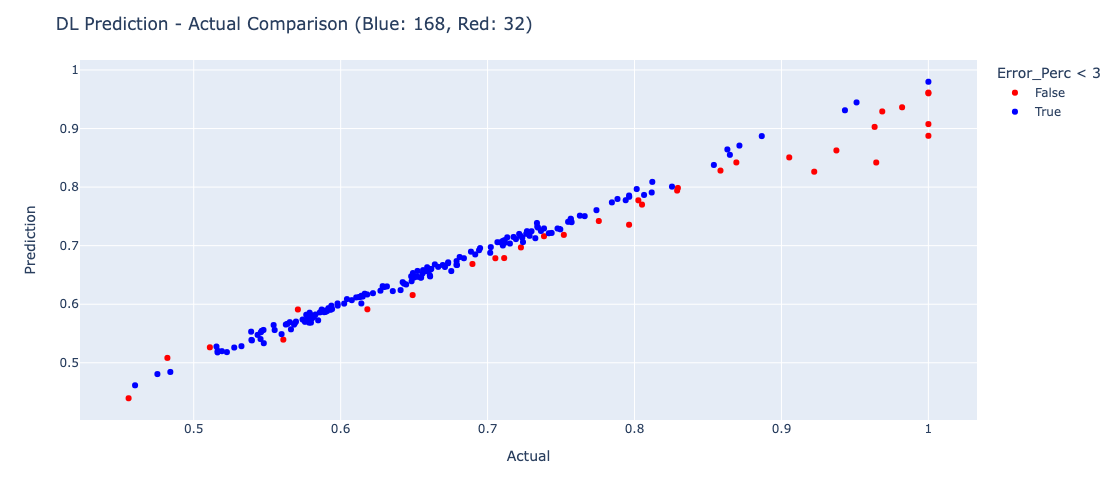

In [46]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DL Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### S22_IO_VRS 

In [47]:
X = dfs_data[1]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,110.03,366.95,98.95,697.08
DMU 2,128.76,153.40,101.17,590.34
DMU 3,126.43,412.75,91.89,513.49
DMU 4,123.73,395.73,98.75,423.26
DMU 5,114.73,333.32,110.78,444.36


In [48]:
y = dfs_es[4]
y.head()

,Efficiency
DMU,
DMU 1,0.862831
DMU 2,0.770272
DMU 3,0.734742
DMU 4,0.748861
DMU 5,0.825456


In [49]:
mitosheet.sheet(y, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-0cc44d48-860f-49fc-b406-66e5df41b8a5", "code": {"imports…

In [50]:
res = pd.read_excel("Data/S22_ML.xlsx")
blue, red = res["Error_Perc < 3"].value_counts()

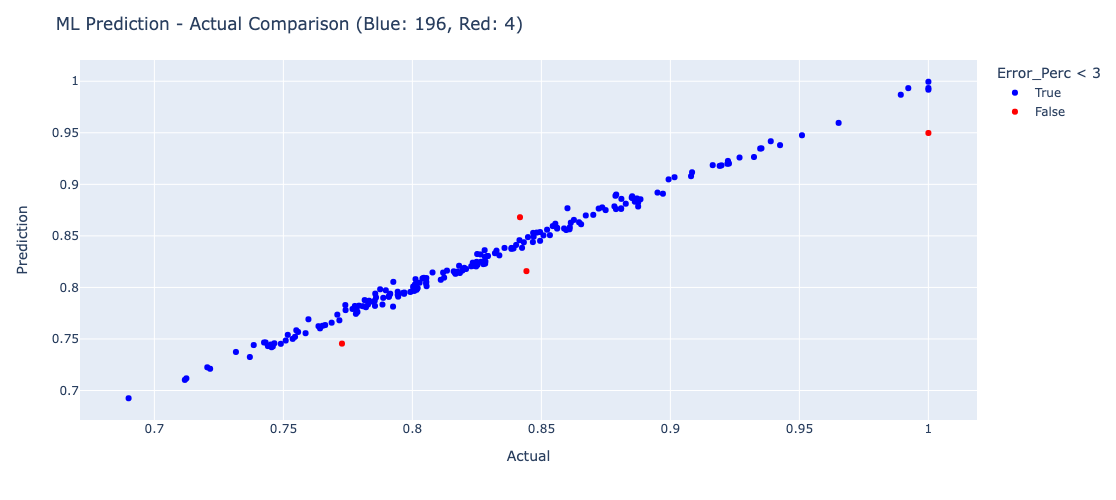

In [51]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"ML Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [52]:
res_ann = pd.read_excel("Data/S22_DL.xlsx")
blue, red = res_ann["Error_Perc < 3"].value_counts()

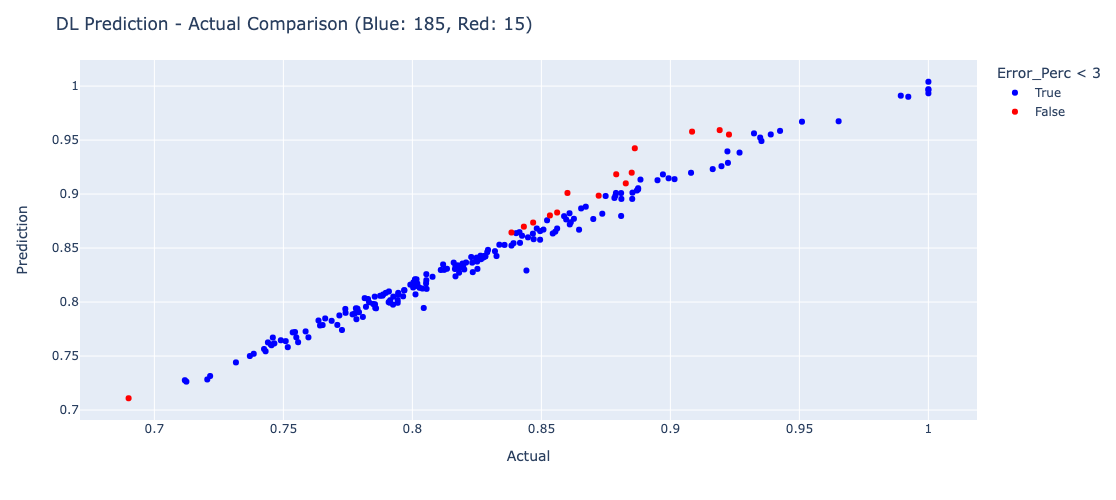

In [53]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DL Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### US55_IO_VRS 

In [54]:
X = dfs_data[2]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,262.93,368.02,311.81,369.14,158.95,373.54,165.68,625.17,620.95,193.29
DMU 2,267.81,449.71,300.84,194.85,195.14,312.06,154.78,360.41,510.36,291.05
DMU 3,315.52,467.64,249.35,285.36,251.24,224.69,214.17,333.71,378.87,180.60
DMU 4,273.62,219.07,245.76,379.23,164.55,345.12,200.72,466.64,560.33,172.56
DMU 5,323.65,298.21,369.23,380.81,117.59,406.04,218.08,513.41,583.01,152.26


In [55]:
y = dfs_es[8]
y.head()

,Efficiency
DMU,
DMU 1,0.907674
DMU 2,0.873908
DMU 3,0.739374
DMU 4,0.966396
DMU 5,0.984420


In [56]:
mitosheet.sheet(y, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-7ad1f98c-9bf6-41d0-aa87-6165f5561b24", "code": {"imports…

In [57]:
res = pd.read_excel("Data/US55_ML.xlsx")
blue, red = res["Error_Perc < 3"].value_counts()

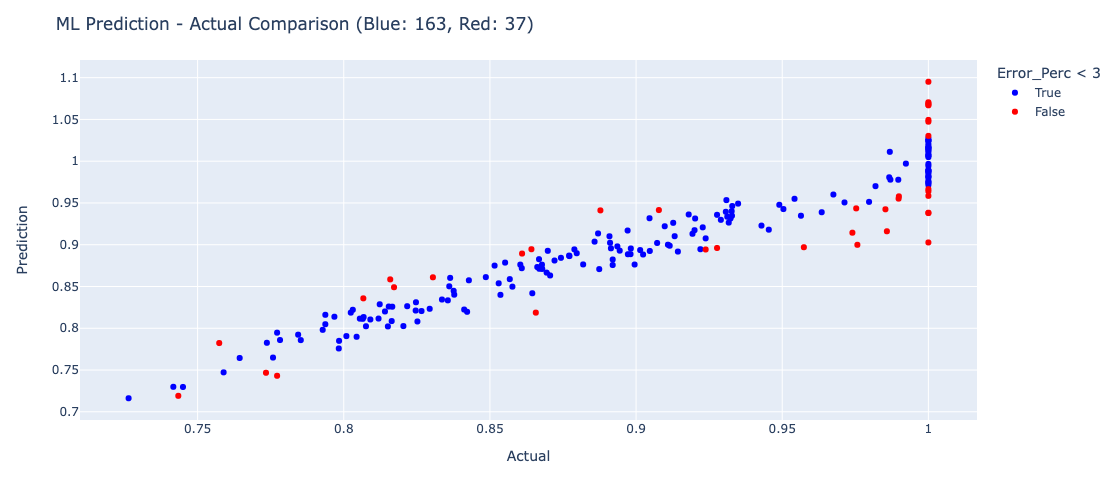

In [58]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"ML Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [59]:
res_ann = pd.read_excel("Data/US55_DL.xlsx")
blue, red = res_ann["Error_Perc < 3"].value_counts()

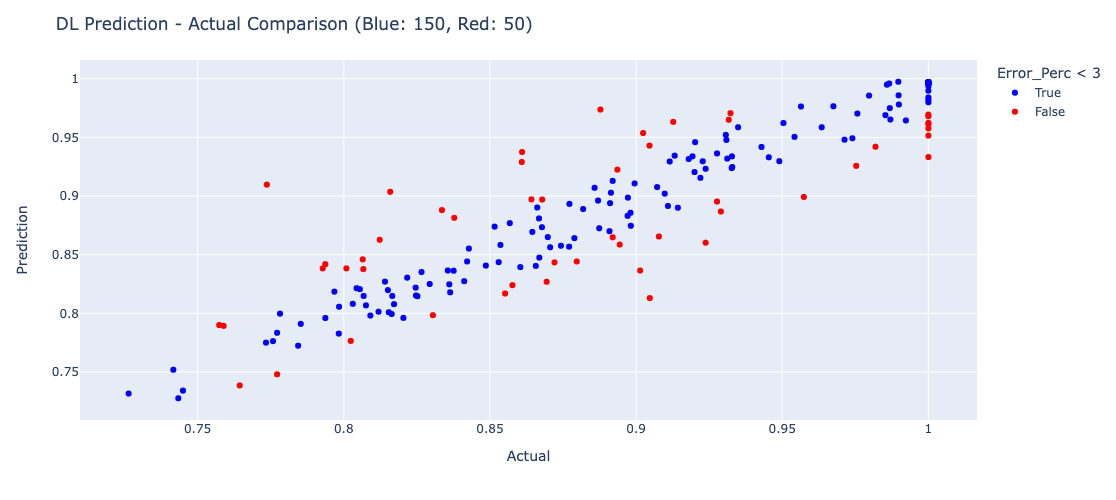

In [60]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DL Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### S55_IO_VRS 

In [61]:
X = dfs_data[3]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,140.18,303.70,235.21,22.82,122.08,102.06,314.78,35.80,39.69,663.95
DMU 2,147.97,263.95,125.54,29.06,162.43,100.09,329.17,61.36,37.58,645.58
DMU 3,141.21,264.98,368.21,28.66,214.37,99.11,414.78,70.21,35.22,355.36
DMU 4,95.55,244.37,251.49,30.25,135.42,118.90,303.65,84.49,49.91,401.68
DMU 5,116.52,271.49,214.32,29.31,284.07,150.47,299.46,71.21,38.18,458.28


In [62]:
y = dfs_es[12]
y.head()

,Efficiency
DMU,
DMU 1,0.868732
DMU 2,0.984469
DMU 3,0.795519
DMU 4,0.973079
DMU 5,0.863545


In [63]:
mitosheet.sheet(y, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-6bf94973-7360-4aaa-835e-3a553d6a4f8f", "code": {"imports…

In [64]:
res = pd.read_excel("Data/S55_ML.xlsx")
blue, red = res["Error_Perc < 3"].value_counts()

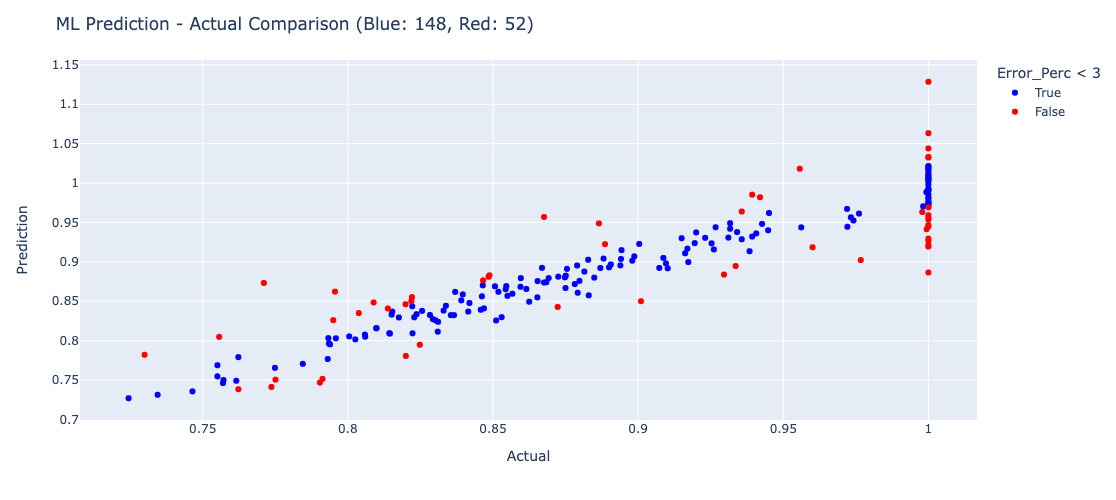

In [65]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"ML Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [66]:
res_ann = pd.read_excel("Data/S55_DL.xlsx")
blue, red = res_ann["Error_Perc < 3"].value_counts()

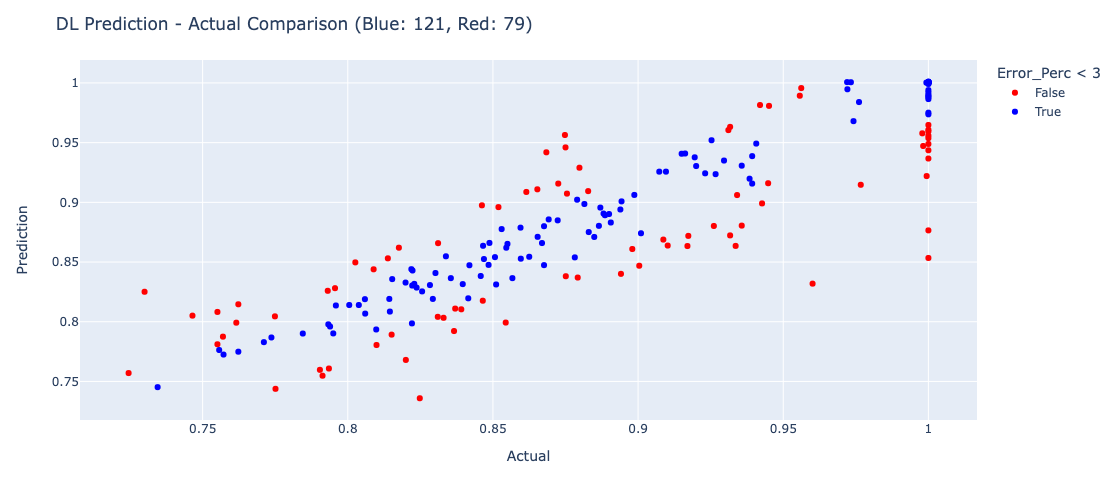

In [67]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DL Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()